In [1]:
from GraphDQNAgent import GraphDQNAgent
from rl_environment import GraphSegmentationEnv
import torch

/home/haakon/mambaforge/envs/maps/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
graph = torch.load("data/aachen_graphs/aachen_000000_000019.pt")
num_classes = 34

/tmp/ipykernel_403753/1818361586.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load("data/aachen_graphs/aachen_000000_000019.pt")


In [3]:
# create an agent
"""        self,
        node_feature_dim: int,
        gnn_hidden_dim: int,
        gnn_output_dim: int,
        dqn_hidden_dim: int,
        num_classes: int,
        device: str = "cuda" if torch.cuda.is_available() else "cpu",
        """

agent = GraphDQNAgent(graph.x.size(-1), 64, 64, 64, num_classes)
env = GraphSegmentationEnv(graph, num_classes)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: haakonmongstad (haakon-dev). Use `wandb login --relogin` to force relogin


In [ ]:
agent.train(env, num_episodes=2, max_steps=1000000)

/home/haakon/programs/mlrwn/MAPS/GraphDQNAgent.py:194: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load(f"{train_dir}/{files[i]}")
/home/haakon/mambaforge/en

classification_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▅▁▁▂▁█▁▁▁▇▁▁▇▁▁▁▁▂▃▁
classification_reward,███████████▁████████▁████████████████▁██
episode,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
episode_classification_reward,▆█▇▇▇▅▅▅▆▇█▆▇▁▆▅▆▆█▆
episode_navigation_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
episode_total_reward,▆█▇▇▇▅▅▅▆▇█▆▇▁▆▅▆▆█▆
epsilon,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
navigation_loss,▁▁▅▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██▁▁▁▁▁▁▁▁▁▁
navigation_reward,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
step,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇████
total_loss,▁▁▁▁▅▁▁▁▁▁▁▃▁▁▁▁█▁▂▁▁▁▂▁▁▁▁█▃█▂▁▁▅▁▁▁▁▁▁


([tensor(7854., device='cuda:0'),
  tensor(9376., device='cuda:0'),
  tensor(8358., device='cuda:0'),
  tensor(8808., device='cuda:0'),
  tensor(8682., device='cuda:0'),
  tensor(6960., device='cuda:0'),
  tensor(7196., device='cuda:0'),
  tensor(7046., device='cuda:0'),
  tensor(7850., device='cuda:0'),
  tensor(8780., device='cuda:0'),
  tensor(9126., device='cuda:0'),
  tensor(7980., device='cuda:0'),
  tensor(8476., device='cuda:0'),
  tensor(3356., device='cuda:0'),
  tensor(7732., device='cuda:0'),
  tensor(6866., device='cuda:0'),
  tensor(8004., device='cuda:0'),
  tensor(8082., device='cuda:0'),
  tensor(9246., device='cuda:0'),
  tensor(7790., device='cuda:0')],
 [tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(0., device='cuda:0'),
  tensor(

In [5]:
graph = torch.load("data/aachen_graphs/aachen_000000_000019.pt")

/tmp/ipykernel_403753/1071605764.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  graph = torch.load("data/aachen_graphs/aachen_000000_000019.pt")


In [7]:
import PIL.Image

image = PIL.Image.open("data/aachen_raw/aachen_000000_000019_leftImg8bit.png")

# create zeroed out array with the same size as the image
import numpy 
img_array = numpy.zeros((image.size[1], image.size[0]))

In [19]:
current_state = {
    "x": graph.x,
    "edge_index": graph.edge_index,
    "current_node": 0,
    "valid_actions_mask": torch.ones(4, dtype=torch.bool)
}

with torch.no_grad():
    for current_node in range(graph.x.size(0)):

        current_state["current_node"] = current_node

        cls_logits, nav_logits = agent.policy_net(current_state)
        cls = cls_logits.argmax().item()

        img_array[int(graph.x[current_node, 1].item()), int(graph.x[current_node, 0].item())] = cls



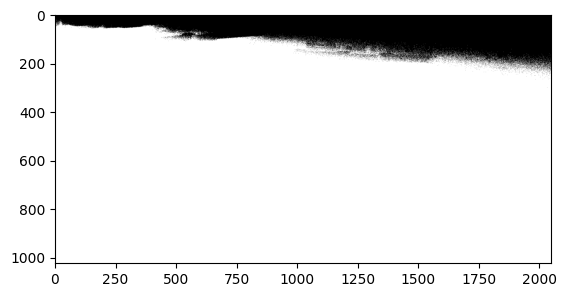

In [22]:
# display the image in grayscale
import matplotlib.pyplot as plt
plt.imshow(img_array, cmap="gray")

In [28]:
len(set(img_array.flatten()))

2